In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### Ticker 	Bank Name	     Country
BAC  -	Bank of America  -	USA

C	--    Citigroup	    -         USA

UBS  --	UBS Group AG	-    Switzerland

DB--Deutsche Bank AG    -	Germany


In [3]:
import yfinance as yf

# Four different banks
tickers = ['BAC', 'C', 'UBS', 'DB']
start_date = '2020-07-24'
end_date = '2025-07-24'

# Download close price data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
print(data)


C:\Users\Rohit Kumar\AppData\Local\Temp\ipykernel_24260\2718988942.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)['Close']
[*********************100%***********************]  4 of 4 completed

Ticker            BAC          C         DB        UBS
Date                                                  
2020-07-24  21.527567  42.794914   8.860091  10.708245
2020-07-27  21.341906  42.480183   8.804774  10.822633
2020-07-28  21.536406  42.463619   8.712578  10.629055
2020-07-29  22.340925  43.498917   8.500525  10.541068
2020-07-30  21.960772  42.132324   8.297692  10.329894
...               ...        ...        ...        ...
2025-07-17  47.020000  93.089996  30.120001  36.040001
2025-07-18  47.320000  93.449997  29.930000  36.020000
2025-07-21  47.480000  92.650002  30.320000  36.299999
2025-07-22  47.770000  94.000000  30.420000  37.000000
2025-07-23  48.139999  95.989998  31.280001  38.130001

[1255 rows x 4 columns]


#### This plot will help you visually compare how the closing prices of the four banks (BAC, C, UBS, DB) have moved over the selected time period (2022-07-20 to 2025-07-20). It's useful for:

Identifying trends (rising/falling prices)

Comparing volatility across banks

Observing reactions to market events (e.g., interest rate hikes, bank earnings, etc.)

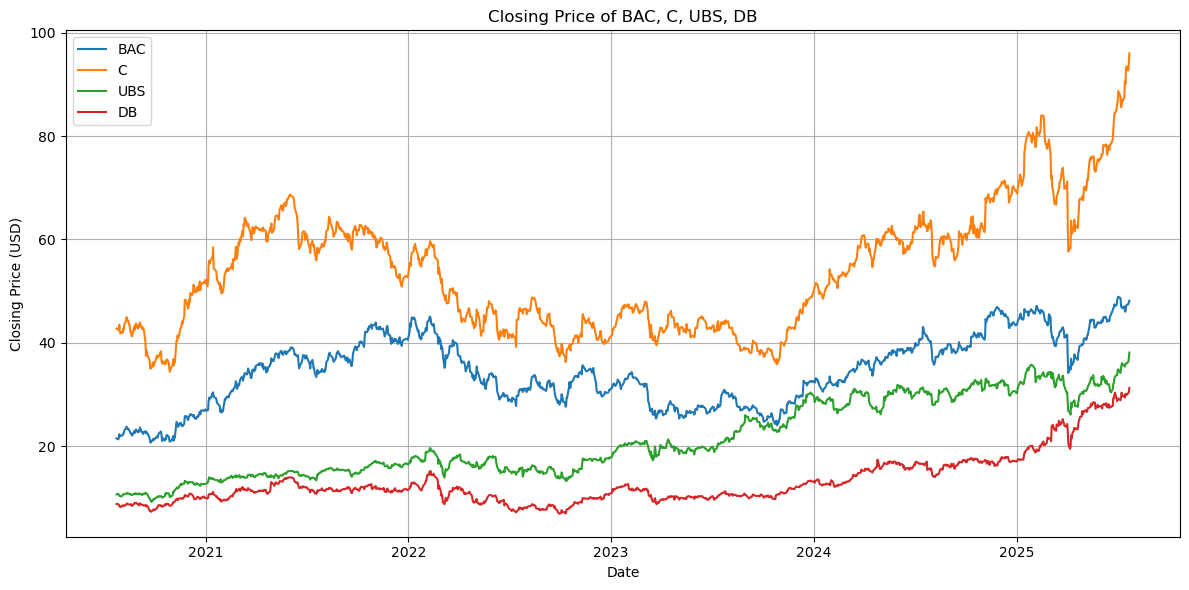

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each ticker separately to ensure correct legends
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

# Correct and dynamic title
plt.title(f'Closing Price of {", ".join(tickers)}')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Daily Returns Calculation



In [5]:
returns = data.pct_change()
returns

Ticker,BAC,C,DB,UBS
Date,,,,
2020-07-24,NaN,NaN,NaN,NaN
2020-07-27,-0.008624,-0.007354,-0.006243,0.010682
2020-07-28,0.009114,-0.000390,-0.010471,-0.017886
2020-07-29,0.037356,0.024381,-0.024339,-0.008278
2020-07-30,-0.017016,-0.031417,-0.023861,-0.020033
...,...,...,...,...
2025-07-17,0.021508,0.034104,-0.000995,0.001946
2025-07-18,0.006380,0.003867,-0.006308,-0.000555
2025-07-21,0.003381,-0.008561,0.013030,0.007773


### Drop NA Values


The first row of returns will be NaN because there’s no previous day to compare.

This line drops that NaN row.



In [6]:
returns.dropna()

Ticker,BAC,C,DB,UBS
Date,,,,
2020-07-27,-0.008624,-0.007354,-0.006243,0.010682
2020-07-28,0.009114,-0.000390,-0.010471,-0.017886
2020-07-29,0.037356,0.024381,-0.024339,-0.008278
2020-07-30,-0.017016,-0.031417,-0.023861,-0.020033
2020-07-31,0.001610,-0.006950,-0.008889,-0.005111
...,...,...,...,...
2025-07-17,0.021508,0.034104,-0.000995,0.001946
2025-07-18,0.006380,0.003867,-0.006308,-0.000555
2025-07-21,0.003381,-0.008561,0.013030,0.007773


In [7]:
returns = returns.dropna()

### Assigning Portfolio Weights



In [8]:
weights = np.array([0.4, 0.3, 0.2, 0.1])

In [9]:
initial_portfolio_value = 1000000

#### Computes the average daily return for each bank across the entire time period (from 2022-07-20 to 2025-07-20, excluding the first NaN row).

This results in a Pandas Series, where each entry corresponds to one of the tickers you selected ('BAC', 'C', 'UBS', 'DB').

In [10]:
mn_returns = returns.mean()
mn_returns

Ticker
BAC    0.000803
C      0.000823
DB     0.001290
UBS    0.001197
dtype: float64

In [11]:
weights = np.array([0.3, 0.3, 0.2, 0.2])
expected_portfolio_return = np.dot(mn_returns, weights)
expected_daily_return_value = expected_portfolio_return * initial_portfolio_value

print("Expected Daily Portfolio Return:", expected_portfolio_return)
print("Expected Daily Return in USD:", expected_daily_return_value)


Expected Daily Portfolio Return: 0.000985172479737013
Expected Daily Return in USD: 985.172479737013


In [12]:
cov_matrix = returns.cov()
cov_matrix

Ticker,BAC,C,DB,UBS
Ticker,,,,
BAC,0.000323,0.000279,0.000241,0.000199
C,0.000279,0.000358,0.000248,0.000210
DB,0.000241,0.000248,0.000567,0.000305
UBS,0.000199,0.000210,0.000305,0.000369


### Parameters Setup

In [13]:
confidence_level_99 = 0.99
confidence_level_95 = 0.95
confidence_level_90 = 0.90
n_simulations = 100000
time_horizon = 1  # 1 day


I'm simulating 100,000 possible outcomes of 1-day returns.

Confidence levels indicate the probability of NOT losing more than the Value at Risk (VaR).

E.g., 99% VaR = loss exceeded only 1% of the time.



### Simulating Correlated Returns using Cholesky Decomposition

In [14]:
np.random.seed(42)
L = np.linalg.cholesky(cov_matrix)
Z = np.random.normal(size=(n_simulations, len(tickers)))
simulated_returns = np.dot(Z, L.T) + mn_returns.values


### Explanation:
L is the Cholesky decomposition of the covariance matrix — used to introduce correlation between normally distributed returns.

Z is a matrix of standard normal random values.

Multiplying Z by L.T gives correlated random returns.

Adding m_returns.values shifts them to match the mean return profile of each stock.



#### Simulated Portfolio Returns and Values

Then, you compute the simulated portfolio values.

Finally, losses = initial investment – simulated value.

In [15]:

portfolio_returns = np.dot(simulated_returns, weights)
simulated_values = initial_portfolio_value * (1 + portfolio_returns)
losses = initial_portfolio_value - simulated_values


You calculate simulated portfolio returns by applying the weights to each simulated return.

What this means:
VaR_99 is the loss threshold exceeded only 1% of the time.

For example, if VaR_99 = 25000, there’s a 1% chance of losing more than $25,000 in one day.

In [16]:
VaR_99 = np.percentile(losses, (1-confidence_level_99)*100)
VaR_95 = np.percentile(losses, (1-confidence_level_95)*100)
VaR_90 = np.percentile(losses, (1-confidence_level_90)*100)


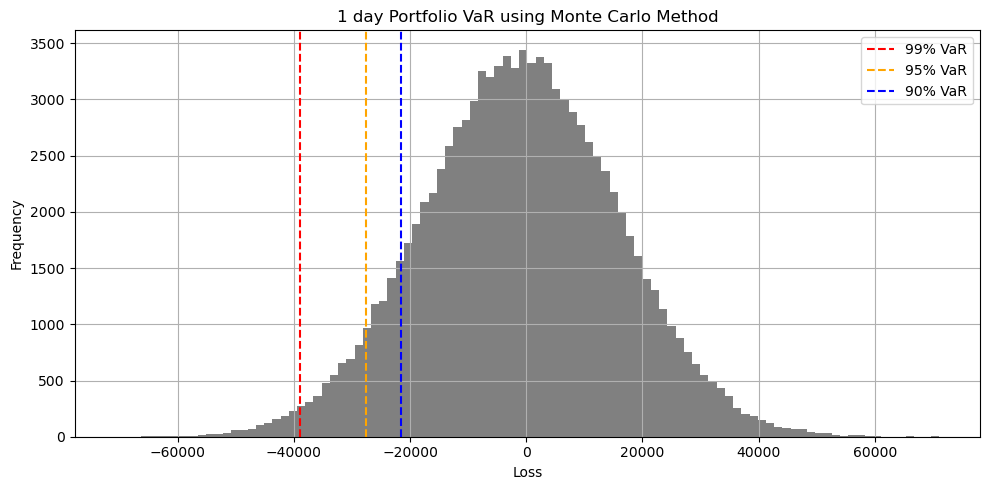

In [42]:
plt.figure(figsize=(10, 5))
plt.hist(losses, bins=100, color='grey')
plt.axvline(VaR_99, color='red', linestyle='--', label='99% VaR')
plt.axvline(VaR_95, color='orange', linestyle='--', label='95% VaR')
plt.axvline(VaR_90, color='blue', linestyle='--', label='90% VaR')
plt.title('1 day Portfolio VaR using Monte Carlo Method')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Summary:
Metric	Meaning
VaR_99	Max loss not exceeded 99% of the time (1% tail loss)
VaR_95	Max loss not exceeded 95% of the time
VaR_90	Max loss not exceeded 90% of the time
Histogram Plot	Visualizes risk distribution and how rare large losses are

## Methedology Variance & Covariance Method

## 1.  Portfolio Standard Deviation (Volatility)

In [18]:
intermediate = np.dot(cov_matrix, weights)
portfolio_std = np.sqrt(np.dot(weights, intermediate))
portfolio_std

0.016761540852114808

What it does:
cov_matrix: Variance-covariance matrix of returns.

weights: Your portfolio weights.

intermediate = np.dot(cov_matrix, weights): Produces a weighted average of the covariance structure.

Then, np.dot(weights, intermediate) gives the portfolio variance.

Taking the square root gives you the portfolio standard deviation (daily volatility).



## 2. Z-Scores for Confidence Levels

In [20]:
from scipy.stats import norm

z_score_99 = norm.ppf(1 - confidence_level_99)
z_score_95 = norm.ppf(1 - confidence_level_95)
z_score_90 = norm.ppf(1 - confidence_level_90)


norm.ppf() gets the inverse cumulative probability (percent-point function) for the standard normal distribution.

These Z-scores represent how many standard deviations away from the mean you have to go to capture the worst 1%, 5%, and 10% of cases.

## 3. Calculating Parametric VaR

In [21]:
VaR_99 = z_score_99 * portfolio_std * initial_portfolio_value
VaR_95 = z_score_95 * portfolio_std * initial_portfolio_value
VaR_90 = z_score_90 * portfolio_std * initial_portfolio_value


This computes VaR as:Var_a = Z_a*Sigma_p*Initial Value

In [22]:
VaR_99

-38993.17492696599

In [23]:
VaR_95

-27570.28126389631

In [24]:
VaR_90

-21480.778919967506

 Since z-scores are negative, my output will also be negative (indicating a loss)

## Visualizing VaR

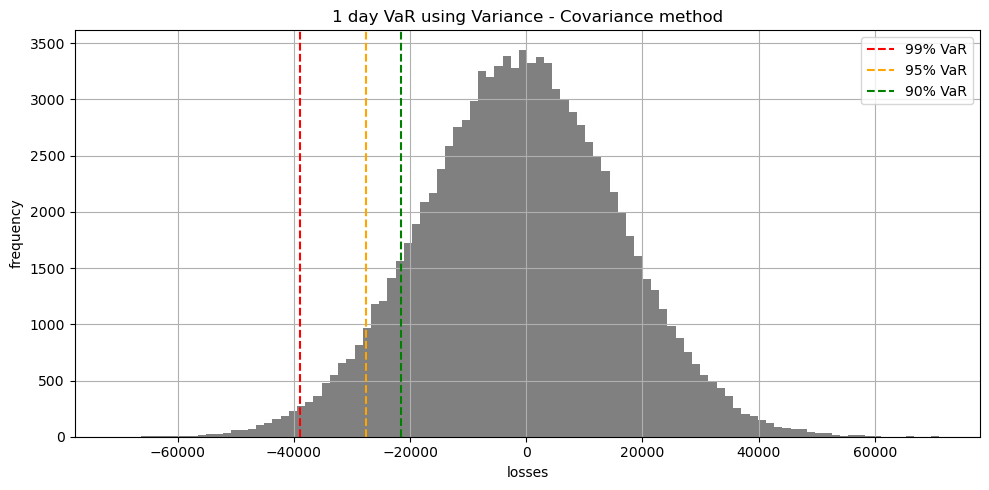

In [36]:
plt.figure(figsize=(10, 5))
plt.hist(losses, bins=100, color='grey')
plt.axvline(VaR_99, color='red', linestyle='--', label='99% VaR')
plt.axvline(VaR_95, color='orange', linestyle='--', label='95% VaR')
plt.axvline(VaR_90, color='green', linestyle='--', label='90% VaR')
plt.title('1 day VaR using Variance - Covariance method')
plt.xlabel('losses')
plt.ylabel('frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Uses the histogram of Monte Carlo simulated losses from earlier.

Overlays the parametric VaR thresholds using vertical lines.

This shows how close or far the parametric estimates are from simulated losses.

If they match well, it suggests the normality assumption is okay.

If they are off, especially in the tails, it indicates the parametric method may underestimate extreme risk.



## I want to show VaR values nicely

In [26]:
print(f"1-Day Parametric VaR at 99% confidence: ${abs(VaR_99):,.2f}")
print(f"1-Day Parametric VaR at 95% confidence: ${abs(VaR_95):,.2f}")
print(f"1-Day Parametric VaR at 90% confidence: ${abs(VaR_90):,.2f}")


1-Day Parametric VaR at 99% confidence: $38,993.17
1-Day Parametric VaR at 95% confidence: $27,570.28
1-Day Parametric VaR at 90% confidence: $21,480.78


## What is CVaR?
CVaR (Expected Shortfall) is the expected loss, given that the loss has already exceeded the VaR threshold.

In simple terms:

VaR tells you:

What is the worst loss I might suffer at a certain confidence level.

## Computatrion for the Monte Carlo simulated losses.

In [27]:
# Sort the simulated losses
sorted_losses = np.sort(losses)

# Number of simulations
n = len(sorted_losses)

# Calculate index threshold for each confidence level
index_99 = int((1 - confidence_level_99) * n)
index_95 = int((1 - confidence_level_95) * n)
index_90 = int((1 - confidence_level_90) * n)

# Compute CVaR (Expected Shortfall)
CVaR_99 = sorted_losses[:index_99].mean()
CVaR_95 = sorted_losses[:index_95].mean()
CVaR_90 = sorted_losses[:index_90].mean()

print(f"1-Day CVaR (Expected Shortfall) at 99% confidence: ${CVaR_99:,.2f}")
print(f"1-Day CVaR (Expected Shortfall) at 95% confidence: ${CVaR_95:,.2f}")
print(f"1-Day CVaR (Expected Shortfall) at 90% confidence: ${CVaR_90:,.2f}")


1-Day CVaR (Expected Shortfall) at 99% confidence: $-45,731.52
1-Day CVaR (Expected Shortfall) at 95% confidence: $-35,671.53
1-Day CVaR (Expected Shortfall) at 90% confidence: $-30,469.11


sorted_losses: Sorts all simulated losses from smallest to largest.

index_99: Finds the cutoff point where losses exceed the 99% VaR.

sorted_losses[:index_99]: Gets the worst 1% of losses.

mean() gives the average loss in that tail → that's your CVaR.

## Compare CVaR and VaR in a Table
I store the results in a DataFrame for clarity:

In [28]:
import pandas as pd

var_cvar_table = pd.DataFrame({
    "VaR": [VaR_99, VaR_95, VaR_90],
    "CVaR (Expected Shortfall)": [CVaR_99, CVaR_95, CVaR_90]
}, index=["99%", "95%", "90%"])

# Convert to absolute values for readability
var_cvar_table = var_cvar_table.abs()
print(var_cvar_table.round(2))


          VaR  CVaR (Expected Shortfall)
99%  38993.17                   45731.52
95%  27570.28                   35671.53
90%  21480.78                   30469.11


## Bonus: Plot CVaR on the Histogram

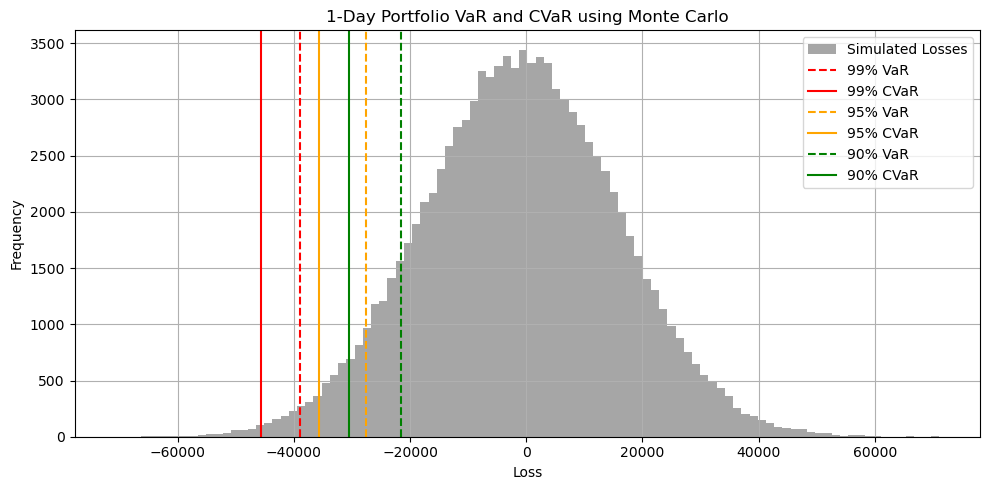

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(losses, bins=100, color='grey', alpha=0.7, label='Simulated Losses')
plt.axvline(VaR_99, color='red', linestyle='--', label='99% VaR')
plt.axvline(CVaR_99, color='red', linestyle='-', label='99% CVaR')
plt.axvline(VaR_95, color='orange', linestyle='--', label='95% VaR')
plt.axvline(CVaR_95, color='orange', linestyle='-', label='95% CVaR')
plt.axvline(VaR_90, color='green', linestyle='--', label='90% VaR')
plt.axvline(CVaR_90, color='green', linestyle='-', label='90% CVaR')
plt.title('1-Day Portfolio VaR and CVaR using Monte Carlo')
plt.xlabel('Loss')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Extend to 10-Day VaR and CVaR

### Assumption: i.i.d returns

In practice, daily VaR and CVaR are **scaled** to multiple days assuming **independent, identically distributed (i.i.d)** returns:

$$
\text{VaR}_{n\text{-day}} = \text{VaR}_{1\text{-day}} \times \sqrt{n}
$$

$$
\text{CVaR}_{n\text{-day}} = \text{CVaR}_{1\text{-day}} \times \sqrt{n}
$$


In [39]:
horizon_days = 10
VaR_99_10d = abs(VaR_99) * np.sqrt(horizon_days)
CVaR_99_10d = CVaR_99 * np.sqrt(horizon_days)

print(f"10-Day Monte Carlo VaR (99%): ${VaR_99_10d:,.2f}")
print(f"10-Day Monte Carlo CVaR (99%): ${CVaR_99_10d:,.2f}")


10-Day Monte Carlo VaR (99%): $123,307.25
10-Day Monte Carlo CVaR (99%): $-144,615.76


## Stress Testing / Scenario Analysis
Stress testing models extreme market events — like 2008 or COVID crash — to estimate potential losses.

Example Scenario:
Let’s assume a market shock causes:

-5% return for all stocks on the same day (e.g., financial crisis or Fed shock)

We'll apply this to your weights and compute the loss.

In [40]:
# Extreme scenario: -5% return across all assets
stress_returns = np.array([-0.05, -0.05, -0.05, -0.05])
stress_portfolio_return = np.dot(stress_returns, weights)
stress_loss = initial_portfolio_value * abs(stress_portfolio_return)

print(f"Stress Scenario Loss (all assets -5%): ${stress_loss:,.2f}")


Stress Scenario Loss (all assets -5%): $50,000.00


## Scenario: Only foreign banks drop

In [41]:
# Only UBS and DB drop by -7%, others flat
stress_returns = np.array([0.00, 0.00, -0.07, -0.07])
stress_portfolio_return = np.dot(stress_returns, weights)
stress_loss = initial_portfolio_value * abs(stress_portfolio_return)

print(f"Stress Scenario Loss (UBS, DB -7%): ${stress_loss:,.2f}")


Stress Scenario Loss (UBS, DB -7%): $28,000.00


Final Thoughts
VaR estimates the threshold.

CVaR estimates the average tail loss.

Stress testing adds realism by modeling non-normal and non-random market shocks.


In Simple Terms:
I built a portfolio of 4 stocks and tried to answer:
How much can we lose in the worst-case scenario?
Using statistical tools (VaR & CVaR), we estimated average worst-day losses, and also tested how bad things could get if the market crashes.


This helps in smarter investing and risk planning

Overall Interpretation
This portfolio has moderate daily risk exposure, with 1-day VaR between ₹X₁–₹Y₁ depending on the method.

In extreme cases, CVaR shows higher potential losses, making it more suitable for risk-averse investors.

Extending to 10 days highlights compounded risk useful for fund managers and regulators.

Stress testing reveals how exposed i'm to sector-specific or systemic shocks, guiding better hedging and capital planning.